## Домашняя работа по теме "Оценка точности модели, переобучение, регуляризация"

***Задание:***
- Посчитать tpr и fpr в ноутбуке с лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами
- Потроить график Precision - Recall на этих же данных

***План:***

1. Загрузить данные из ноутбука с лекции, изучить их
2. Посчитать tpr и fpr, построить ROC-AUC, убедиться, что он получается таким же, как и при использовании штатных средств
3. Потроить график Precision - Recall на этих же данных

## <u/>Шаг 1. Копируем блокнот с лекции и изучаем его:</u>

# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, data['affair'], test_size=0.3, random_state=0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4456, 9), (1910, 9), (4456,), (1910,))

In [7]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [8]:
X = data[data.columns[:-1]]
X.head(2)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [9]:
Y = data['affair']

In [10]:
model = LogisticRegression()

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

Обучаем модель

In [12]:
model.fit(X_train, Y_train)

LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [13]:
predictions = model.predict_proba(X_test)

In [14]:
predictions[:2]

array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867]])

In [15]:
# for line in zip( predictions[:, 1], Y_test ):
#     print( line )

In [16]:
model.score(X_test, Y_test)

0.7319371727748691

Построим набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [17]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = i)
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    print("{}: {}".format(i, model.score(X_test, Y_test)))

0: 0.7319371727748691
1: 0.731413612565445
2: 0.7172774869109948
3: 0.7198952879581152
4: 0.7136125654450262
5: 0.7272251308900524
6: 0.7136125654450262
7: 0.7361256544502618
8: 0.7162303664921466
9: 0.7204188481675393


### Оценка качества модели

Считаем accuracy последней модели

In [18]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], Y_test ):    
    if predicted_prob >= 0.5:
        predicted = 1
    else:
        predicted = 0
    
    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1
    
    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1

In [19]:
pred = model.predict(X_test)

In [20]:
tp, fp, fn, tn

(221, 168, 366, 1155)

In [21]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.7204188481675393

In [22]:
precision = tp / (tp + fp)
precision

0.5681233933161953

In [23]:
recall = tp / (tp + fn)
recall

0.37649063032367974

In [24]:
from sklearn.metrics import recall_score, precision_score

In [25]:
recall_score(Y_test, pred)

0.37649063032367974

In [26]:
precision_score(Y_test, pred)

0.5681233933161953

Для дальнейшего использования введем новые переменные, куда скопируем тестовые выборки:

In [27]:
features_test = X_test.copy()
target_test = Y_test.copy()

### Используем готовые библиотеки

In [28]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [29]:
pr, re, thres = precision_recall_curve( Y_test, predictions[:, 1] )

In [30]:
pr.shape, thres.shape

((1702,), (1701,))

In [31]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.307813319349764, 1.0, 0.048952984917428465)
(0.3074501573976915, 0.9982964224872232, 0.0520981910084146)
(0.30761154855643047, 0.9982964224872232, 0.052539545526114846)
(0.3077731092436975, 0.9982964224872232, 0.05290951870845545)
(0.30793483972674723, 0.9982964224872232, 0.05372856461455865)
(0.30809674027339645, 0.9982964224872232, 0.05418294149063976)
(0.30825881115202525, 0.9982964224872232, 0.05456382069180715)
(0.30842105263157893, 0.9982964224872232, 0.05474131099110639)
(0.30858346498156924, 0.9982964224872232, 0.05545339786678181)
(0.3087460484720759, 0.9982964224872232, 0.057801337556126875)
(0.30890880337374804, 0.9982964224872232, 0.059328241937930376)
(0.3090717299578059, 0.9982964224872232, 0.05936553934794898)
(0.3092348284960422, 0.9982964224872232, 0.06182230442048081)
(0.3093980992608237, 0.9982964224872232, 0.0621053106007649)
(0.30956154252509244, 0.9982964224872232, 0.06244017276329904)
(0.3091966173361522, 0.9965928449744463, 0.06245992732748873)
(0.30936012691

In [32]:
import matplotlib.pyplot as plt

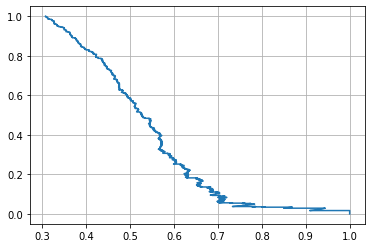

In [33]:
plt.plot(pr,re)
plt.grid()

In [34]:
from sklearn.metrics import average_precision_score

In [35]:
# площадь под кривой
average_precision_score( Y_test, predictions[:, 1] )

0.5370782474582139

#### ROC

In [36]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [37]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )

In [38]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9445589136616164)
(0.0, 0.0017035775127768314, 0.9445589136616165)
(0.0, 0.017035775127768313, 0.8789939381045629)
(0.0007558578987150416, 0.017035775127768313, 0.87864787797536)
(0.0007558578987150416, 0.028960817717206135, 0.8743556662994783)
(0.0022675736961451248, 0.028960817717206135, 0.8701673276762187)
(0.0022675736961451248, 0.034071550255536626, 0.8668201408363144)
(0.003779289493575208, 0.034071550255536626, 0.8579621221487028)
(0.003779289493575208, 0.03577512776831346, 0.8557638744938815)
(0.0045351473922902496, 0.03577512776831346, 0.8523294480399521)
(0.0045351473922902496, 0.03747870528109029, 0.8505415404541217)
(0.006046863189720333, 0.03747870528109029, 0.8373703328422848)
(0.006046863189720333, 0.049403747870528106, 0.8283556867638548)
(0.006802721088435374, 0.049403747870528106, 0.8272570828329096)
(0.006802721088435374, 0.05281090289608177, 0.824423781430831)
(0.007558578987150416, 0.05281090289608177, 0.822890285017045)
(0.007558578987150416, 0.054514

In [39]:
t = []
for line in zip( fpr, tpr, thres ):
    t.append(line[2])

In [40]:
t

[1.9445589136616164,
 0.9445589136616165,
 0.8789939381045629,
 0.87864787797536,
 0.8743556662994783,
 0.8701673276762187,
 0.8668201408363144,
 0.8579621221487028,
 0.8557638744938815,
 0.8523294480399521,
 0.8505415404541217,
 0.8373703328422848,
 0.8283556867638548,
 0.8272570828329096,
 0.824423781430831,
 0.822890285017045,
 0.8224351159562083,
 0.8196685322937426,
 0.8183635288753621,
 0.816386699171467,
 0.8087144112025862,
 0.8034423167282204,
 0.8014168462967666,
 0.7968387550227388,
 0.7935137396248806,
 0.7934598210230559,
 0.7922139930408799,
 0.7903803692416985,
 0.7891504284370688,
 0.7883356906473128,
 0.7835479342597357,
 0.7814777493287214,
 0.7752028254348426,
 0.7739795117815801,
 0.7733451077556982,
 0.7702919820204798,
 0.7683214798200103,
 0.7675063401748835,
 0.7597921156462412,
 0.7550313324179606,
 0.7540097900708297,
 0.749321398682678,
 0.7480296232279365,
 0.7451326010238404,
 0.7422223912185263,
 0.737808352533955,
 0.7370496503383993,
 0.7323032472869451,

In [41]:
import matplotlib.pyplot as plt

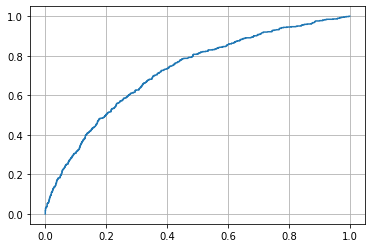

In [42]:
plt.plot( fpr, tpr )
plt.grid()

**Построим еще одну модель и сравним их между собой**

In [43]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [44]:
model2 = LogisticRegression()

In [45]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [46]:
model2.fit( X_train_short, Y_train )

LogisticRegression()

In [47]:
predictions2 = model2.predict_proba( X_test_short )

In [48]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

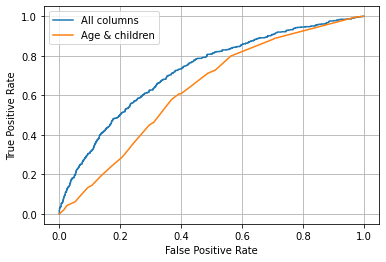

In [49]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.grid()
plt.show()


**Посчитаем площадь под ROC-кривой для двух моделей**

In [50]:
from sklearn.metrics import roc_curve

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
roc_auc_score( Y_test, predictions[:, 1] )

0.5141543845719105

In [53]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [54]:
from sklearn.metrics import auc

In [55]:
auc( fpr, tpr )

0.7225943566902436

In [56]:
auc( fpr2, tpr2 )

0.6311452091928271

### Пример влияния L1 и L2-регуляризации

In [57]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions1 = model1.predict_proba( X_test )

In [58]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [59]:
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [60]:
fpr1, tpr1, thres1 = roc_curve( Y_test, predictions1[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

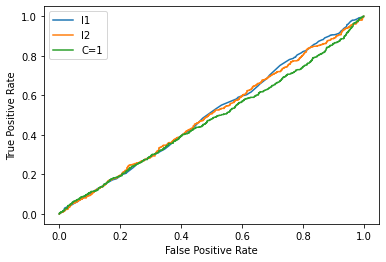

In [61]:
plt.plot( fpr1, tpr1, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [62]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

,age_17.5,age_22.0,age_27.0,age_32.0,age_37.0,age_42.0,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.5
0,0,0,0,1,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,0


In [63]:
Y = data['affair']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [65]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01, solver='liblinear' ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1, solver='liblinear' ).fit( X_train, Y_train )

In [66]:
predictions1 = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [67]:
fpr1, tpr1, thres1 = roc_curve( Y_test, predictions1[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

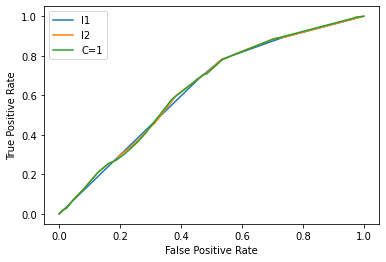

In [68]:
plt.plot( fpr1, tpr1, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

## <u/>Шаг 2. Домашняя работа: Посчитаем вручную tpr и fpr.</u>

Как мы помним, **TPR** (true positive rate) показывает долю найденных объектов класса в отношении к общему числу объектов класса. Т.е. насколько хорошо наш классификатор находит объекты из класса. Иными словами, это полнота:

$$TPR=\frac{TP}{(TP+FN)}$$


**FPR** (false positive rate) же показывает долю неверных срабатываний классификатора к общему числу объектов за пределами класса. Т.е, насколько часто классификатор ошибается при отнесении того или иного объекта к классу. Считается, как:

$$FPR=\frac{FP}{(FP+TN)}$$

Итак, если мы вернемся к этапу "Оценка качества модели", то увидим, что для стандартного порога 0,5 tp, fp, fn, tn у нас уже посчитаны. Вот они:

In [69]:
tp, fp, fn, tn

(221, 168, 366, 1155)

Но нам также известно, что кривая ошибок строится с учетом вариаций пороговых значений, соответственно, нам нужно посчитать tpr и fpr для разных пороговых значений. Выберем 2000 значений порога рандомно:

In [70]:
import numpy as np
import random
threshold = np.array([random.random() for i in range(2000)])
threshold

array([0.53198082, 0.55328317, 0.61243075, ..., 0.45480374, 0.16352918,
       0.10413859])

Отсортируем threshold в порядке возрастания:

In [71]:
threshold.sort()
threshold

array([2.02007388e-04, 2.46519143e-04, 8.36349783e-04, ...,
       9.99296490e-01, 9.99431041e-01, 9.99854686e-01])

Пороги готовы. Теперь возьмем написанный выше цикл, считающий tp, fp, fn и tn, и обернем его в функцию, чтобы было удобно перебирать пороги и высчитывать таким образом матрицу ошибок предсказаний для каждого порога (но мы получившиеся значения возьмем не в виде матрицы, а просто вернем составляющие):

In [72]:
def my_confusion_matrix(model, features, target, thresh):
    tp = 0 
    fp = 0 
    fn = 0 
    tn = 0 

    predictions = model.predict_proba(features)
    for predicted_prob, actual in zip( predictions[:, 1], target):    
        if predicted_prob >= thresh:
            predicted = 1
        else:
            predicted = 0

        if predicted == 1:
            if actual == 1:
                tp += 1
            else:
                fp += 1

        else:
            if actual == 1:
                fn += 1
            else:
                tn += 1
    return tp, fp, fn, tn

Проверим работу функции:

In [73]:
my_confusion_matrix(model, features_test, target_test, 0.8)

(37, 15, 550, 1308)

In [74]:
my_confusion_matrix(model, features_test, target_test, 0.1)

(576, 1206, 11, 117)

In [75]:
my_confusion_matrix(model, features_test, target_test, 0.5)

(221, 168, 366, 1155)

Сравним с тем, что рассчитано ранее:

In [76]:
tp, fp, fn, tn

(221, 168, 366, 1155)

Всё работает. Теперь переберем в цикле все рандомно подобранные пороги и рассчитаем для каждого tp, fp, fn, tn:

In [77]:
tp_new = []
fp_new = []
fn_new = []
tn_new = []

In [78]:
for t in threshold:
    tp_new.append(my_confusion_matrix(model, features_test, target_test, t)[0])
    fp_new.append(my_confusion_matrix(model, features_test, target_test, t)[1])
    fn_new.append(my_confusion_matrix(model, features_test, target_test, t)[2])
    tn_new.append(my_confusion_matrix(model, features_test, target_test, t)[3])

In [79]:
tp_new[:5], tp_new[-5:]

([587, 587, 587, 587, 587], [0, 0, 0, 0, 0])

In [80]:
fp_new[:5], fp_new[-5:]

([1323, 1323, 1323, 1323, 1323], [0, 0, 0, 0, 0])

In [81]:
fn_new[:5], fn_new[-5:]

([0, 0, 0, 0, 0], [587, 587, 587, 587, 587])

In [82]:
tn_new[:5], tn_new[-5:]

([0, 0, 0, 0, 0], [1323, 1323, 1323, 1323, 1323])

Посчитаем tpr и fpr для каждого порога:

In [83]:
tpr_new = []
fpr_new = []
for i in range(len(tp_new)):
    tpr_new.append(tp_new[i] / (tp_new[i] + fn_new[i]))
    fpr_new.append(fp_new[i] / (fp_new[i] + tn_new[i]))
tpr_new[115:125], fpr_new[115:125]

([0.9982964224872232,
  0.9982964224872232,
  0.9982964224872232,
  0.9982964224872232,
  0.9982964224872232,
  0.9982964224872232,
  0.9982964224872232,
  0.9982964224872232,
  0.9982964224872232,
  0.9982964224872232],
 [0.9924414210128496,
  0.9924414210128496,
  0.9916855631141346,
  0.9916855631141346,
  0.9916855631141346,
  0.9916855631141346,
  0.9916855631141346,
  0.9916855631141346,
  0.9909297052154195,
  0.9909297052154195])

И, наконец, построим график ROC-AUC:

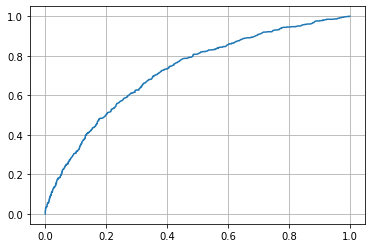

In [84]:
plt.plot( fpr_new, tpr_new )
plt.grid()

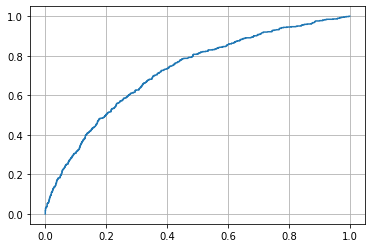

In [85]:
plt.plot( fpr, tpr )
plt.grid()

У нас получился график ROC-AUC в точности как и при расчете штатными средствами. Переходим к следующему заданию.

## <u/>Шаг 3. Потроим график Precision - Recall на этих же данных.</u>

Для построения графика необходимо расчитать метрики полноты и точности.  

Мы помним, что **точность** - это доля объектов, действительно принадлежащих данному классу, относительно всех объектов, которые система отнесла к этому классу.

$$Precision=\frac{TP}{(TP+FP)}$$

**Полнота** - это доля найденных классфикатором объектов, принадлежащих классу, относительно всех объектов этого класса в выборке. Иными словами, это TPR.

$$Recall=\frac{TP}{(TP+FN)}$$


Для расчета точности и полноты нам нужны списки tp_new, fp_new, fn_new и tn_new. Вспомним, что получилось рассчитать у нас, например, при использовании сотого по очередности порога:

In [86]:
tp_new[100], fp_new[100], fn_new[100], tn_new[100]

(586, 1320, 1, 3)

Ну и, собственно, сам порог:

In [87]:
threshold[100]

0.04976777989268211

Порог слишком мал для корректного определения принадлежности объекта к тому или иному классу. Неудивительно, что у нас получилось огромное количество ложноположительных ответов (ошибки первого рода).

Посчитаем метрику точности и полноты (по сути полноту нам считать нет необходимости, но, чтобы не запутаться в переменных, всё же посчитаем ее):

In [88]:
pres_new = []
rec_new = []
for i in range(len(tp_new)):
    try:
        pres_new.append(tp_new[i] / (tp_new[i] + fp_new[i]))
        rec_new.append(tp_new[i] / (tp_new[i] + fn_new[i]))
    except ZeroDivisionError:
        continue
pres_new[1015:1025]

[0.5688311688311688,
 0.5718015665796344,
 0.5718015665796344,
 0.5718015665796344,
 0.5706806282722513,
 0.5706806282722513,
 0.5710526315789474,
 0.5714285714285714,
 0.5714285714285714,
 0.5714285714285714]

In [89]:
rec_new[1015:1025]

[0.3730834752981261,
 0.3730834752981261,
 0.3730834752981261,
 0.3730834752981261,
 0.37137989778534924,
 0.37137989778534924,
 0.3696763202725724,
 0.3679727427597956,
 0.3679727427597956,
 0.3679727427597956]

Всё готово для того, чтобы строить график.

Вспомним, каким был график выше:

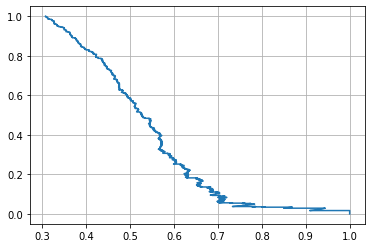

In [90]:
plt.plot(pr,re)
plt.grid()

Построим такой график на наших данных:

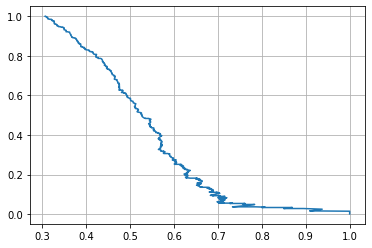

In [91]:
plt.plot(pres_new, rec_new)
plt.grid()

Таким образом, мы видим, что графики идентичны. Да, возможны некие незначительные отличия, но они могут возникнуть лишь из-за того, что пороги нами созданы случайным образом и могут не совпадать с порогами, выбранными при использовании библиотеки sklearn.

## Вывод

Цели данной работы были:  
    1. Посчитать tpr и fpr, построить ROC-AUC, убедиться, что он получается таким же, как и при использовании штатных средств  
2. Потроить график Precision - Recall на этих же данных

Работа состояла из 3 этапов. 
- На первом этапе мы ознакомились со способом решения задачи расчета метрик и построения графиков при помощи штатных средств, в частности - библиотеки sklearn.
- Вторым этапом стал расчет вручную всех необходимых показателей для вычисления tpr и fpr, а также построение кривой ошибок на основе полученных данных. В результате построения кривая совпала с той, которую отрисовали при помощи штатных средств.
- На заключительном этапе мы расчитали показатели матрицы правильных и неправильных ответов. Далее вычислили показатели для метрик precision и recall, на основе которых создали кривую precision-recall и убедились, что она также совпадает с той, что создана на основе данных, расчитанных при помощи библиотеки sklearn.  

Таким образом, цели работы достигнуты, а мы разобрались в процессе расчета метрик.